# CS210 Project: Letterboxd Data Analysis

## Introduction

Letterboxd is a social media platform for film lovers. Users can rate and review films, create lists, and follow other users. The Letterboxd API provides access to data about films, users, and lists. This project uses my data that I got from the platform using "export own data" option to gather insights on my film watching habits.

## Data

The data used in this project is my personal data from Letterboxd. It contains information about the films I have watched, the ratings I have given them, and the lists I have created. The data was exported from Letterboxd in the form of a CSV file.
## Methods

The data was analyzed using Python. A Jupyter Notebook was used to run the Python code. The project contains several parts:

1. Import data
2. Create a Pandas DataFrame from the data
3. Clean the data
4. Analyze the data
5. Make visualizations
6. Build machine learning models


## Imports

Data analysis libraries like pandas, matplotlib, numpy are used in this project.



In [1]:
# import thye necessary libraries for data analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


### Start Handling And Cleaning The Data



#### Importing CSV Files

In [2]:
#read the file.
#print number of the rows and columns. 

watchlist_df = pd.read_csv('letterboxd-enjoytheride-2024-01-13-14-21-utc/watchlist.csv')
watched_df = pd.read_csv('letterboxd-enjoytheride-2024-01-13-14-21-utc/watched.csv')
reviews_df = pd.read_csv('letterboxd-enjoytheride-2024-01-13-14-21-utc/reviews.csv')
ratings_df = pd.read_csv('letterboxd-enjoytheride-2024-01-13-14-21-utc/ratings.csv')
diary_df = pd.read_csv('letterboxd-enjoytheride-2024-01-13-14-21-utc/diary.csv')


#### See The Data

Now, we call the head method for each dataset to find out what we are working with. This will provide us insight about the content of our csv files. Then, we will call info method to gain additional data.

In [3]:
watchlist_df.head()

# Date	Name	Year	Letterboxd URI
# 0	2020-10-03	Lady Bird	2017.0	https://boxd.it/dGNE
# 1	2020-10-03	Whiplash	2014.0	https://boxd.it/7bQA
# 2	2020-10-03	The Wolf of Wall Street	2013.0	https://boxd.it/3C1m
# 3	2020-10-03	2001: A Space Odyssey	1968.0	https://boxd.it/2bf0
# 4	2020-10-03	Booksmart	2019.0	https://boxd.it/igNS

,Date,Name,Year,Letterboxd URI
0,2020-10-03,Lady Bird,2017.0,https://boxd.it/dGNE
1,2020-10-03,Whiplash,2014.0,https://boxd.it/7bQA
2,2020-10-03,The Wolf of Wall Street,2013.0,https://boxd.it/3C1m
3,2020-10-03,2001: A Space Odyssey,1968.0,https://boxd.it/2bf0
4,2020-10-03,Booksmart,2019.0,https://boxd.it/igNS


In [4]:
watched_df.head()

# Date	Name	Year	Letterboxd URI
# 0	2020-10-03	Pulp Fiction	1994	https://boxd.it/29Pq
# 1	2020-10-03	Inception	2010	https://boxd.it/1skk
# 2	2020-10-03	Baby Driver	2017	https://boxd.it/bhF2
# 3	2020-10-03	Interstellar	2014	https://boxd.it/4VZ8
# 4	2020-10-03	The Grand Budapest Hotel	2014	https://boxd.it/3ZqO


,Date,Name,Year,Letterboxd URI
0,2020-10-03,Pulp Fiction,1994,https://boxd.it/29Pq
1,2020-10-03,Inception,2010,https://boxd.it/1skk
2,2020-10-03,Baby Driver,2017,https://boxd.it/bhF2
3,2020-10-03,Interstellar,2014,https://boxd.it/4VZ8
4,2020-10-03,The Grand Budapest Hotel,2014,https://boxd.it/3ZqO


In [5]:
ratings_df.head()

# Date	Name	Year	Letterboxd URI	Rating
# 0	2020-10-03	Mad Max: Fury Road	2015	https://boxd.it/2DjO	5.0
# 1	2020-10-03	Forrest Gump	1994	https://boxd.it/728	5.0
# 2	2020-10-03	Amadeus	1984	https://boxd.it/2aH8	5.0
# 3	2020-10-04	Love	2015	https://boxd.it/9brE	3.0
# 4	2020-10-26	The Purge: Anarchy	2014	https://boxd.it/71zk	1.


,Date,Name,Year,Letterboxd URI,Rating
0,2020-10-03,Mad Max: Fury Road,2015,https://boxd.it/2DjO,5.0
1,2020-10-03,Forrest Gump,1994,https://boxd.it/728,5.0
2,2020-10-03,Amadeus,1984,https://boxd.it/2aH8,5.0
3,2020-10-04,Love,2015,https://boxd.it/9brE,3.0
4,2020-10-26,The Purge: Anarchy,2014,https://boxd.it/71zk,1.0


In [6]:
reviews_df.head()

# Date	Name	Year	Letterboxd URI	Rating	Rewatch	Review	Tags	Watched Date
# 0	2022-01-03	Annette	2021	https://boxd.it/2qEXxN	5.0	NaN	another level of filming yani	NaN	2022-01-01
# 1	2022-04-30	The Lovers on the Bridge	1991	https://boxd.it/2NArUT	5.0	NaN	French people are French people as usual	NaN	2022-04-30
# 2	2022-08-09	Rain Man	1988	https://boxd.it/36ZO3f	5.0	NaN	Ops... fart :|	NaN	2022-08-08
# 3	2022-10-30	When Marnie Was There	2014	https://boxd.it/3nnQOf	NaN	NaN	weirdest twist ever i guess	NaN	2022-10-29
# 4	2023-01-26	The Banshees of Inisherin	2022	https://boxd.it/3LmgE3	4.5	NaN	men are weird	NaN	2023-01-25
 


,Date,Name,Year,Letterboxd URI,Rating,Rewatch,Review,Tags,Watched Date
0,2022-01-03,Annette,2021,https://boxd.it/2qEXxN,5.0,NaN,another level of filming yani,NaN,2022-01-01
1,2022-04-30,The Lovers on the Bridge,1991,https://boxd.it/2NArUT,5.0,NaN,French people are French people as usual,NaN,2022-04-30
2,2022-08-09,Rain Man,1988,https://boxd.it/36ZO3f,5.0,NaN,Ops... fart :|,NaN,2022-08-08
3,2022-10-30,When Marnie Was There,2014,https://boxd.it/3nnQOf,NaN,NaN,weirdest twist ever i guess,NaN,2022-10-29
4,2023-01-26,The Banshees of Inisherin,2022,https://boxd.it/3LmgE3,4.5,NaN,men are weird,NaN,2023-01-25


In [7]:
diary_df.head()

# 	Date	Name	Year	Letterboxd URI	Rating	Rewatch	Tags	Watched Date
# 0	2021-04-05	At Eternity's Gate	2018	https://boxd.it/1LU9jp	NaN	NaN	NaN	2019-12-12
# 1	2021-04-05	Hair	1979	https://boxd.it/1LUaQf	NaN	NaN	NaN	2019-12-27
# 2	2021-04-05	The Dreamers	2003	https://boxd.it/1LUb63	NaN	NaN	NaN	2019-12-29
# 3	2021-04-05	Irreversible	2002	https://boxd.it/1LUbkJ	NaN	NaN	NaN	2019-12-30
# 4	2021-04-05	A Streetcar Named Desire	1951	https://boxd.it/1LUc2L	NaN	NaN	NaN	2019-12-31


,Date,Name,Year,Letterboxd URI,Rating,Rewatch,Tags,Watched Date
0,2021-04-05,At Eternity's Gate,2018,https://boxd.it/1LU9jp,NaN,NaN,NaN,2019-12-12
1,2021-04-05,Hair,1979,https://boxd.it/1LUaQf,NaN,NaN,NaN,2019-12-27
2,2021-04-05,The Dreamers,2003,https://boxd.it/1LUb63,NaN,NaN,NaN,2019-12-29
3,2021-04-05,Irreversible,2002,https://boxd.it/1LUbkJ,NaN,NaN,NaN,2019-12-30
4,2021-04-05,A Streetcar Named Desire,1951,https://boxd.it/1LUc2L,NaN,NaN,NaN,2019-12-31


In [8]:
print("Watchlist DataFrame Info:")
print(watchlist_df.info())
print("\nWatched DataFrame Info:")
print(watched_df.info())
print("\nReviews DataFrame Info:")
print(reviews_df.info())
print("\nRatings DataFrame Info:")
print(ratings_df.info())
print("\nDiary DataFrame Info:")
print(diary_df.info())

# Watchlist DataFrame Info:
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 304 entries, 0 to 303
# Data columns (total 4 columns):
#  #   Column          Non-Null Count  Dtype  
# ---  ------          --------------  -----  
#  0   Date            304 non-null    object 
#  1   Name            304 non-null    object 
#  2   Year            302 non-null    float64
#  3   Letterboxd URI  304 non-null    object 
# dtypes: float64(1), object(3)
# memory usage: 9.6+ KB
# None

# Watched DataFrame Info:
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 452 entries, 0 to 451
# Data columns (total 4 columns):
#  #   Column          Non-Null Count  Dtype 
# ---  ------          --------------  ----- 
#  0   Date            452 non-null    object
#  1   Name            452 non-null    object
#  2   Year            452 non-null    int64 
#  3   Letterboxd URI  452 non-null    object
# dtypes: int64(1), object(3)
# memory usage: 14.3+ KB
# None

# Reviews DataFrame Info:
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 14 entries, 0 to 13
# Data columns (total 9 columns):
#  #   Column          Non-Null Count  Dtype  
# ---  ------          --------------  -----  
#  0   Date            14 non-null     object 
#  1   Name            14 non-null     object 
#  2   Year            14 non-null     int64  
#  3   Letterboxd URI  14 non-null     object 
#  4   Rating          9 non-null      float64
#  5   Rewatch         0 non-null      float64
#  6   Review          14 non-null     object 
#  7   Tags            0 non-null      float64
#  8   Watched Date    14 non-null     object 
# dtypes: float64(3), int64(1), object(5)
# memory usage: 1.1+ KB
# None

# Ratings DataFrame Info:
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 57 entries, 0 to 56
# Data columns (total 5 columns):
#  #   Column          Non-Null Count  Dtype  
# ---  ------          --------------  -----  
#  0   Date            57 non-null     object 
#  1   Name            57 non-null     object 
#  2   Year            57 non-null     int64  
#  3   Letterboxd URI  57 non-null     object 
#  4   Rating          57 non-null     float64
# dtypes: float64(1), int64(1), object(3)
# memory usage: 2.4+ KB
# None

# Diary DataFrame Info:
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 197 entries, 0 to 196
# Data columns (total 8 columns):
#  #   Column          Non-Null Count  Dtype  
# ---  ------          --------------  -----  
#  0   Date            197 non-null    object 
#  1   Name            197 non-null    object 
#  2   Year            197 non-null    int64  
#  3   Letterboxd URI  197 non-null    object 
#  4   Rating          50 non-null     float64
#  5   Rewatch         23 non-null     object 
#  6   Tags            0 non-null      float64
#  7   Watched Date    197 non-null    object 
# dtypes: float64(2), int64(1), object(5)
# memory usage: 12.4+ KB
# None


Watchlist DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            304 non-null    object 
 1   Name            304 non-null    object 
 2   Year            302 non-null    float64
 3   Letterboxd URI  304 non-null    object 
dtypes: float64(1), object(3)
memory usage: 9.6+ KB
None

Watched DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            452 non-null    object
 1   Name            452 non-null    object
 2   Year            452 non-null    int64 
 3   Letterboxd URI  452 non-null    object
dtypes: int64(1), object(3)
memory usage: 14.3+ KB
None

Reviews DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13

#### Cleaning The Data

Now we can see that the data in diary.csv file is not read correctly by pandas. We need to fix this by declaring the types of objects manually for the columns when the dataset is being read. Let's try that.

In [11]:
import pandas as pd

# Specify the data types for each column
column_types = {
    'Date': 'object',
    'Name': 'object',
    'Year': 'float64',
    'Rewatch': 'object',
    'Letterboxd URI': 'object'
}

# Read the CSV file with the specified data types
diary_df = pd.read_csv('letterboxd-enjoytheride-2024-01-13-14-21-utc/diary.csv', dtype=column_types)

# Print the DataFrame info to check if the import was successful

print(diary_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            197 non-null    object 
 1   Name            197 non-null    object 
 2   Year            197 non-null    float64
 3   Letterboxd URI  197 non-null    object 
 4   Rating          50 non-null     float64
 5   Rewatch         23 non-null     object 
 6   Tags            0 non-null      float64
 7   Watched Date    197 non-null    object 
dtypes: float64(3), object(5)
memory usage: 12.4+ KB
None


In [12]:
# Map NaN values in rewatched column into 0
diary_df['Rewatch'] = diary_df['Rewatch'].fillna(0)

# Map 'Rewatch' column to binary values
diary_df['Rewatch'] = diary_df['Rewatch'].map({'Yes': 1, 'No': 0})

# Print the updated DataFrame
print(diary_df.head())


         Date                      Name    Year          Letterboxd URI  \
0  2021-04-05        At Eternity's Gate  2018.0  https://boxd.it/1LU9jp   
1  2021-04-05                      Hair  1979.0  https://boxd.it/1LUaQf   
2  2021-04-05              The Dreamers  2003.0  https://boxd.it/1LUb63   
3  2021-04-05              Irreversible  2002.0  https://boxd.it/1LUbkJ   
4  2021-04-05  A Streetcar Named Desire  1951.0  https://boxd.it/1LUc2L   

   Rating  Rewatch  Tags Watched Date  
0     NaN      NaN   NaN   2019-12-12  
1     NaN      NaN   NaN   2019-12-27  
2     NaN      NaN   NaN   2019-12-29  
3     NaN      NaN   NaN   2019-12-30  
4     NaN      NaN   NaN   2019-12-31  


In [14]:
# Convert the 'Date' column to pandas date object
diary_df['Date'] = pd.to_datetime(diary_df['Date'])



# Convert the 'Watched Date' column to pandas date object
diary_df['Watched Date'] = pd.to_datetime(diary_df['Watched Date'])

# Print the updated DataFrame
print(diary_df.head())

        Date                      Name    Year          Letterboxd URI  \
0 2021-04-05        At Eternity's Gate  2018.0  https://boxd.it/1LU9jp   
1 2021-04-05                      Hair  1979.0  https://boxd.it/1LUaQf   
2 2021-04-05              The Dreamers  2003.0  https://boxd.it/1LUb63   
3 2021-04-05              Irreversible  2002.0  https://boxd.it/1LUbkJ   
4 2021-04-05  A Streetcar Named Desire  1951.0  https://boxd.it/1LUc2L   

   Rating  Rewatch  Tags Watched Date  
0     NaN      NaN   NaN   2019-12-12  
1     NaN      NaN   NaN   2019-12-27  
2     NaN      NaN   NaN   2019-12-29  
3     NaN      NaN   NaN   2019-12-30  
4     NaN      NaN   NaN   2019-12-31  


### Visualization

Now, I want to show you the graph of the years of the films I have watched, and years I have watched them in.

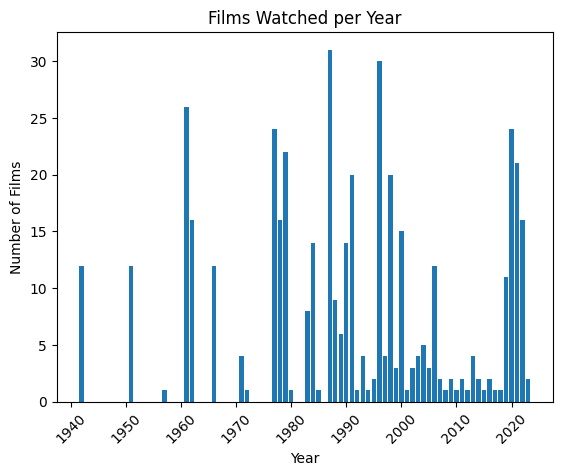

In [15]:
import matplotlib.pyplot as plt

# Get the unique years from the 'Year' column in the watched_df DataFrame
watched_years = watched_df['Year'].unique()

# Count the number of films watched in each year
films_per_year = watched_df['Year'].value_counts().sort_index()

# Create a bar plot
plt.bar(watched_years, films_per_year)

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.title('Films Watched per Year')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


Now let's make a scatterplot with the years I have watched the film in and the year of that film itself.

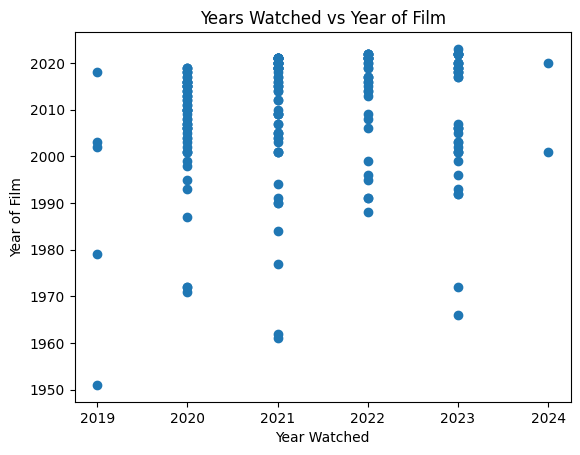

In [18]:
import matplotlib.pyplot as plt

# Get the years from the 'Year' column in the watched_df DataFrame
watched_years = diary_df['Year']

# Get the years you have watched the film in from the 'Watched Date' column in the diary_df DataFrame
watched_in_years = diary_df['Watched Date'].dt.year

# Create a scatterplot
plt.scatter(watched_in_years, watched_years)

# Set the labels and title
plt.xlabel('Year Watched')
plt.ylabel('Year of Film')
plt.title('Years Watched vs Year of Film')

# Show the plot
plt.show()


Let's see the counts of the films I have watched per month.

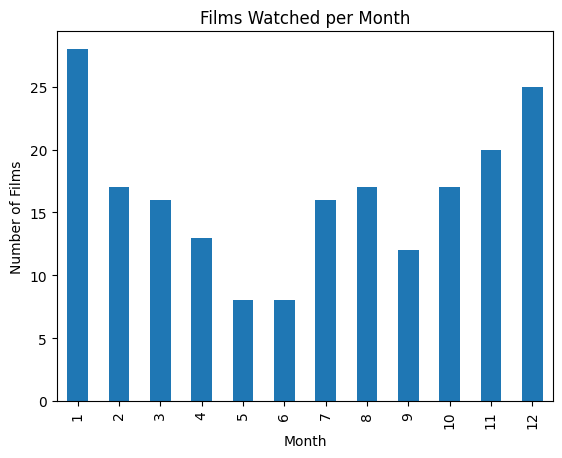

In [19]:
# Convert the 'Watched Date' column to pandas datetime object
diary_df['Watched Date'] = pd.to_datetime(diary_df['Watched Date'])

# Group the data by month and count the number of films in each month
films_per_month = diary_df.groupby(diary_df['Watched Date'].dt.month)['Name'].count()

# Create a bar plot
films_per_month.plot(kind='bar')

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Number of Films')
plt.title('Films Watched per Month')

# Show the plot
plt.show()
